# Innovative Model

In [1]:
import utils 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read from the preprocessed data
df = pd.read_excel('../data/processed/cleaned_data.xlsx', sheet_name='cleaned_data')

df.head()

,TITLE,CPC,ASIGNEE,FILING_DATE,YEAR,PATENT_NO,CATEGORY,PRODUCT,SSTT_TAXONOMY,SECTION
0,DEAD TIME GENERATOR AND DIGITAL SIGNAL PROCESS...,H03K5/1515;H03K3/017;H03F3/2173;H03K3/78;H03F1...,NaN,2018-06-22,2018,20200220527,ARTIFICIAL INTELLIGENCE,INFORMATION AND SIGNAL PROCESSING TECHNOLOGIES,A09,A
1,APPARATUS AND METHOD FOR SPEAKER TUNING AND AU...,H04R3/12;H04R1/26;H04R1/403;H04R29/002;H04R1/026,"HARMAN INTERNATIONAL INDUSTRIES, INCORPORATED",2018-06-01,2018,20200169821,ARTIFICIAL INTELLIGENCE,INFORMATION AND SIGNAL PROCESSING TECHNOLOGIES,A09,A
2,MODIFIED PI-SIGMA-DELTA-MODULATOR BASED DIGITA...,H03M3/42;H03M3/414;H03M7/3022;H03M3/352;H03M7/...,"HUAWEI TECHNOLOGIES CO., LTD.",2018-11-02,2018,10615819,ARTIFICIAL INTELLIGENCE,INFORMATION AND SIGNAL PROCESSING TECHNOLOGIES,A09,A
3,DIGITAL SIGNAL PROCESSING NOISE FILTER TO INCR...,G06F9/45558;H04L43/50;H04L41/0604;H04L43/20;H0...,NaN,2018-05-25,2018,20190363970,ARTIFICIAL INTELLIGENCE,INFORMATION AND SIGNAL PROCESSING TECHNOLOGIES,A09,A
4,OPTICAL SIGNAL PROCESSING DEVICE,H04B10/548;H04J14/0213;G02F1/31;H04J14/0212;H0...,NaN,2017-12-25,2017,20190349112,ARTIFICIAL INTELLIGENCE,INFORMATION AND SIGNAL PROCESSING TECHNOLOGIES,A09,A


Groupby to understand well the data distribution

In [3]:
# Group by 'YEAR' and count occurrences
grouped_df = df.groupby('YEAR').size().reset_index(name='COUNT')

# Display grouped DataFrame
grouped_df

,YEAR,COUNT
0,2006,177
1,2007,176
2,2008,183
3,2009,151
4,2010,149
5,2011,154
6,2012,134
7,2013,167
8,2014,187
9,2015,213


## S Curve

Calculate cumulative count per category

In [4]:
categories = ['ARTIFICIAL INTELLIGENCE', 'AVIATION', 'COMPOSITE', 'LASER', 'SPACE']

# Calculate cumulative count per category making Time Series table
ts_table = utils.calculate_cumulative_count_per_category(df, categories)

In [5]:
ts_table

,YEAR,Applications_Per_Year,Cumulative_Count,CATEGORY
0,2006,48,48,ARTIFICIAL INTELLIGENCE
1,2007,45,93,ARTIFICIAL INTELLIGENCE
2,2008,48,141,ARTIFICIAL INTELLIGENCE
3,2009,40,181,ARTIFICIAL INTELLIGENCE
4,2010,43,224,ARTIFICIAL INTELLIGENCE
...,...,...,...,...
60,2014,37,314,SPACE
61,2015,38,352,SPACE
62,2016,70,422,SPACE
63,2017,63,485,SPACE


Plot the S Curve

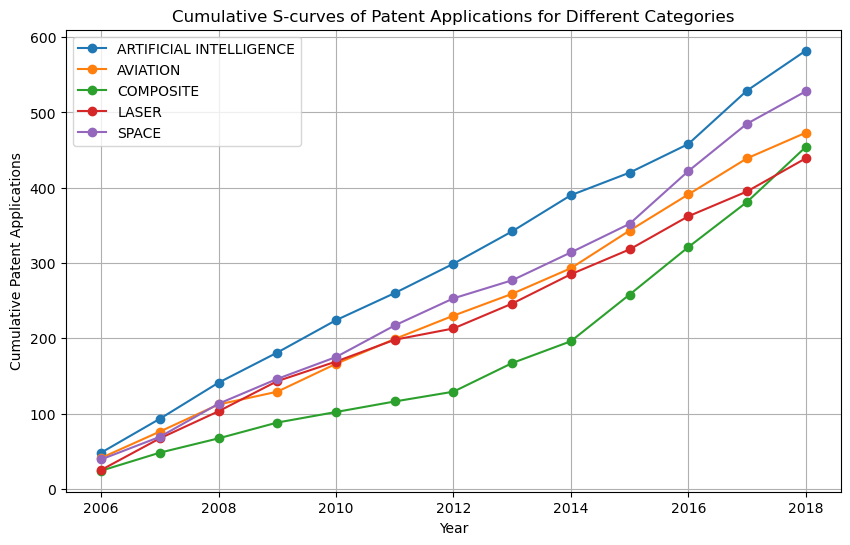

In [6]:
utils.plot_cumulative_s_curves(ts_table)

## Logistic Growth Model

For category 'ARTIFICIAL INTELLIGENCE': L=724.9065207752503, k=0.271133354588306, t0=2013.4326005057244


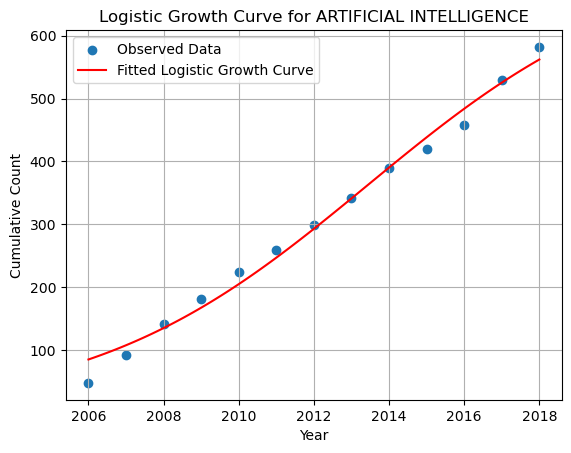

For category 'AVIATION': L=680.5584857709187, k=0.25437514894461416, t0=2014.7997348885883


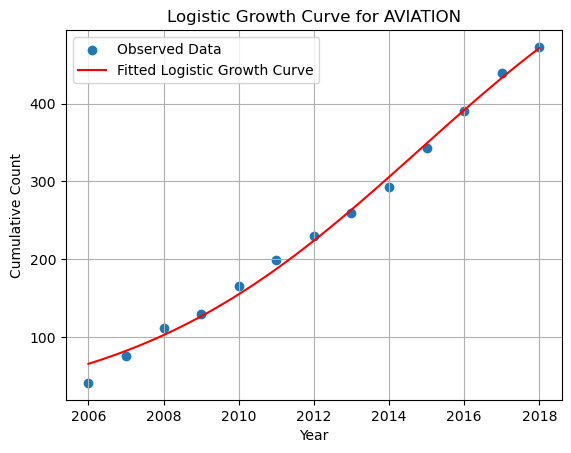

For category 'COMPOSITE': L=3957.954768048838, k=0.21287396951769297, t0=2027.5570660640215


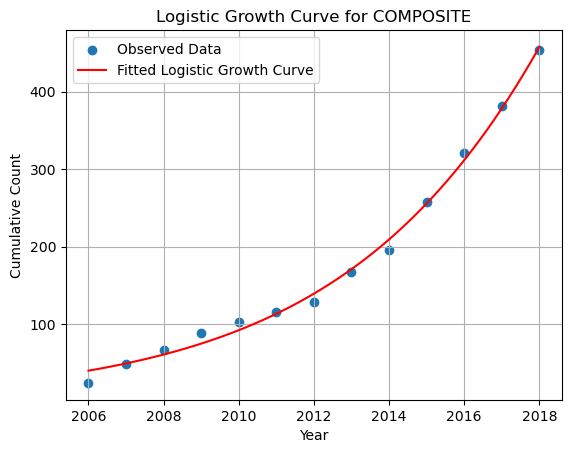

For category 'LASER': L=563.8188867257205, k=0.2691002448798267, t0=2013.7515185069262


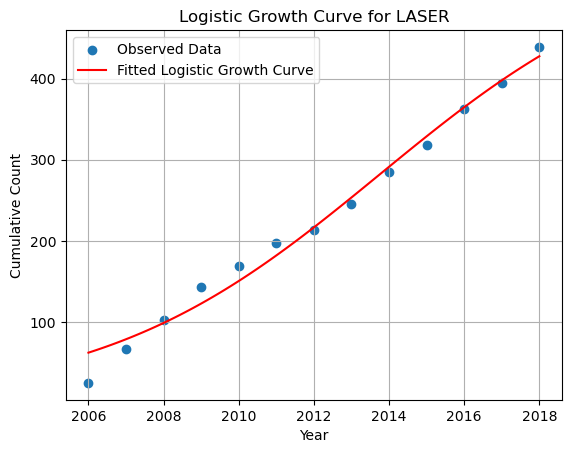

For category 'SPACE': L=823.2682080169659, k=0.2440944742687084, t0=2015.7224166760966


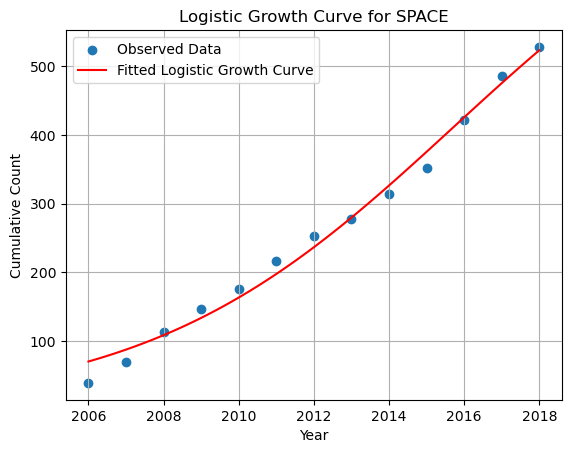

In [7]:
# Plot logistic growth curves for each category
for category, category_data in ts_table.groupby('CATEGORY'):
    # Fit logistic growth function to data
    L, k, t0 = utils.fit_logistic_growth(category_data)
    print(f"For category '{category}': L={L}, k={k}, t0={t0}")
    # Plot logistic growth curve
    utils.plot_logistic_growth(category_data, L, k, t0, f'Logistic Growth Curve for {category}')